# Week 11 - Introduction to Modeling, part 2

# 1. Lesson - No lesson this week

# 2. Weekly graph question

In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import root_mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

The book names one of Vonnegut's rules as "keep it simple" and another as "have the guts to cut."  Here is some data from the previous week's lesson.  If you had to cut one of the two plots below, which would it be?  Which seems more interesting or important?  Explain.  (Should "amount of training data used" or "number of estimators" be on the x-axis.)

In [22]:
np.random.seed(0)
num_points = 10000
feature_1a = np.random.random(size = num_points) * 3
feature_2a = np.random.random(size = num_points) * 3
feature_3a = np.random.random(size = num_points) * 3
train_target = (feature_1a - 2 * feature_2a) * feature_3a + np.random.normal(size = num_points)
feature_1b = np.random.random(size = num_points) * 3
feature_2b = np.random.random(size = num_points) * 3
feature_3b = np.random.random(size = num_points) * 3
test_target = (feature_1b - 2 * feature_2b) * feature_3b + np.random.normal(size = num_points)
train_df = pd.DataFrame({"f1": feature_1a, "f2": feature_2a, "f3": feature_3a})
test_df = pd.DataFrame({"f1": feature_1b, "f2": feature_2b, "f3": feature_3b})
rf = RandomForestRegressor()
rf.fit(train_df.values, train_target)

RandomForestRegressor()

In [23]:
rmse_lst = list()
rf = RandomForestRegressor()
for x in range(round(num_points / 20), num_points, round(num_points / 20)):
    rf.fit(train_df.values[0:x,:], train_target[0:x])
    rmse_lst.append(root_mean_squared_error(rf.predict(test_df.values), test_target))

import matplotlib.pyplot as plt

Text(0, 0.5, 'Loss function')

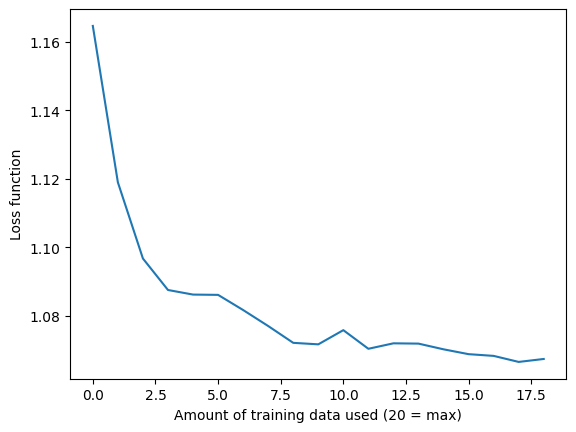

In [24]:
plt.plot(rmse_lst)
plt.xlabel("Amount of training data used (20 = max)")
plt.ylabel("Loss function")

In [25]:
num_trees_lst = list()
for n_estimators in range(1, 100, 3):
    rf = RandomForestRegressor(n_estimators = n_estimators)
    rf.fit(train_df.values, train_target)
    num_trees_lst.append(root_mean_squared_error(rf.predict(test_df.values), test_target))

Text(0, 0.5, 'Loss function')

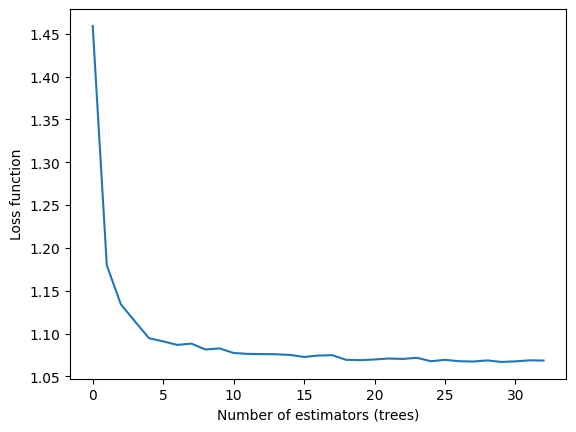

In [26]:
plt.plot(num_trees_lst)
plt.xlabel("Number of estimators (trees)")
plt.ylabel("Loss function")

The first graph shows the inceasing amount of training data size that affects model performance. It shows collections of data on the x-axis and loss function on the y-axis.

The second graph shows the increased the number of trees in given Random Forest. Only up to a point, more trees might improve performance.

I would keep the first graph training data size because it tells me whether I need more data which is a important decision.

I would cut the second graph which shows number of trees because it's just about tuning and the effect is smaller.


# 3. Working on your datasets

This week, you will do the same types of exercises as last week, but you should use your own datasets that you found last semester.

Here are some types of analysis you can do:

* Implement a random forest model.
* Perform cross-validation.
* Tune hyperparameters.
* Evaluate a performance metric.

If you like, you can try other types of models, too (beyond linear regression and random forest) although you will have many opportunities to do that next semester.

In [27]:
df_1 = pd.read_csv("/content/dataset_phishing.csv")
df_1.head()

,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,http://www.crestonwood.com/router.php,37,19,0,3,0,0,0,0,0,...,0,1,0,45,-1,0,1,1,4,legitimate
1,http://shadetreetechnology.com/V4/validation/a...,77,23,1,1,0,0,0,0,0,...,1,0,0,77,5767,0,0,1,2,phishing
2,https://support-appleld.com.secureupdate.duila...,126,50,1,4,1,0,1,2,0,...,1,0,0,14,4004,5828815,0,1,0,phishing
3,http://rgipt.ac.in,18,11,0,2,0,0,0,0,0,...,1,0,0,62,-1,107721,0,0,3,legitimate
4,http://www.iracing.com/tracks/gateway-motorspo...,55,15,0,2,2,0,0,0,0,...,0,1,0,224,8175,8725,0,0,6,legitimate


In [28]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Drop URL column, which is not useful directly.
df_1 = df_1.drop(columns=["url"])

# Convert "status" to numbers
le = LabelEncoder()
df_1["status"] = le.fit_transform(df_1["status"])  # phishing = 1, legitimate = 0

# Split data
X = df_1.drop("status", axis=1)
y = df_1["status"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [30]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [31]:



y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))

Accuracy: 0.9698162729658792
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1157
           1       0.98      0.96      0.97      1129

    accuracy                           0.97      2286
   macro avg       0.97      0.97      0.97      2286
weighted avg       0.97      0.97      0.97      2286



In [32]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation and compute accuracy score
scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
print("Cross-validated accuracy scores:", scores)
print("Average accuracy:", scores.mean())


Cross-validated accuracy scores: [0.96806649 0.96675416 0.96544182 0.96062992 0.96981627]
Average accuracy: 0.9661417322834647


In [33]:
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    'n_estimators': [50, 100, 150],
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 4, 6]
}

search = RandomizedSearchCV(
    estimator=RandomForestClassifier(),
    param_distributions=param_dist,
    n_iter=5,
    cv=5,
    scoring='accuracy',
    random_state=42
)

search.fit(X_train, y_train)
print("Best parameters:", search.best_params_)
print("Best Score from Search:", search.best_score_)


Best parameters: {'n_estimators': 50, 'min_samples_split': 4, 'max_depth': 20}
Best Score from Search: 0.9625987464302934


 I used machine learning to detect phishing websites based on their features. I used the Random Forest Classifier to classify websites as either phishing or legitimate. I removed the url column because it was not useful for modeling directly. Then I converted the status column into numbers using Label Encoding so the model can understand it. I trained a Random Forest Classifier to predict if a website is phishing or not. After training, I tested the model using new data. The model got 96.98% accuracy on the test data. I also used a classification report to see how accurate the predictions are?, how many phishing sites were correctly identified?, and a balanced score combining precision and recall. The results showed that the model performs very well at identifying both phishing and legitimate websites. I used 5-fold cross-validation to check if the model is reliable on different parts of the data. The average accuracy across the 5 folds was 96.61%, showing that the model is consistent. I used RandomizedSearchCV to find the best settings for the model. The best parameters were n_estimators: 50, max_depth: 20, min_samples_split: 4. Using these settings, the model achieved a best cross-validated score of 96.26%.

 This project showed how to preprocess data, how to build a classification model using Random Forest, how to measure model performance using accuracy and classification metrics, how to tune the model for better performance using hyperparameter search.

 The model was highly accurate and effective at detecting phishing websites.







In [34]:
df_2 = pd.read_csv("/content/Phishing_Email.csv")
df_2.head()

,Unnamed: 0,Email Text,Email Type
0,0,"re : 6 . 1100 , disc : uniformitarianism , re ...",Safe Email
1,1,the other side of * galicismos * * galicismo *...,Safe Email
2,2,re : equistar deal tickets are you still avail...,Safe Email
3,3,\nHello I am your hot lil horny toy.\n I am...,Phishing Email
4,4,software at incredibly low prices ( 86 % lower...,Phishing Email


In [35]:
df_2 = df_2[["Email Text", "Email Type"]]  # Keep only useful columns
df_2.head()

,Email Text,Email Type
0,"re : 6 . 1100 , disc : uniformitarianism , re ...",Safe Email
1,the other side of * galicismos * * galicismo *...,Safe Email
2,re : equistar deal tickets are you still avail...,Safe Email
3,\nHello I am your hot lil horny toy.\n I am...,Phishing Email
4,software at incredibly low prices ( 86 % lower...,Phishing Email


In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Encode "Email Type" (Safe Email = 0, Phishing Email = 1)
le = LabelEncoder()
df_2["Email Type"] = le.fit_transform(df_2["Email Type"])

# Fill missing text values
df_2["Email Text"] = df_2["Email Text"].fillna("")

# Convert text to numerical vectors
vectorizer = TfidfVectorizer(stop_words="english", max_features=1000)
X = vectorizer.fit_transform(df_2["Email Text"])
y = df_2["Email Type"]


In [38]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9525469168900804
              precision    recall  f1-score   support

           0       0.92      0.96      0.94      1457
           1       0.97      0.95      0.96      2273

    accuracy                           0.95      3730
   macro avg       0.95      0.95      0.95      3730
weighted avg       0.95      0.95      0.95      3730



In [39]:
# Perform 5-fold cross-validation
scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
print("Cross-validated accuracy scores:", scores)
print("Average accuracy:", scores.mean())

Cross-validated accuracy scores: [0.95630027 0.95576408 0.9538874  0.9536193  0.9538874 ]
Average accuracy: 0.9546916890080428


In [40]:
# Define search space
param_dist = {
    'n_estimators': [50, 100, 150],
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 5, 10]
}

# Search best parameters
search = RandomizedSearchCV(
    estimator=RandomForestClassifier(),
    param_distributions=param_dist,
    n_iter=10,
    cv=5,
    scoring='accuracy',
    random_state=42
)

search.fit(X, y)
print("Best parameters:", search.best_params_)
print("Best cross-validated accuracy:", search.best_score_)

Best parameters: {'n_estimators': 150, 'min_samples_split': 10, 'max_depth': None}
Best cross-validated accuracy: 0.95485254691689


I used a dataset containing email texts labeled as either “Safe Email” or “Phishing Email.” The goal was to build a machine learning model that can automatically detect phishing emails based on their text content. I kept only the useful columns: "Email Text" and "Email Type". I converted the email labels into numbers: 0 = Safe Email, 1 = Phishing Email. Then I filled missing email text with an empty string. I used TF-IDF vectorization to convert the email text into numbers that a machine learning model can understand. I limited the number of features to 1000 and removed common stop words like "the", "and", etc. I trained a Random Forest Classifier, which is an ensemble model that combines multiple decision trees. Then I split the dataset into training and test sets 80/20 split. The model achieved 95.25% accuracy on the test data. I used 5-fold cross-validation to check if the model works well on different parts of the data. The average accuracy across all folds was 95.47%, which confirms the model's reliability. I used RandomizedSearchCV to find the best model settings like number of trees and tree depth. The best model had n_estimators: 150, min_samples_split: 10, max_depth: None. The best cross-validated accuracy with these settings was 95.49%.



In [2]:
df_3 = pd.read_csv("/content/2022-12-09-enriched.csv")
df_3.head()

,cve_id,vendor_project,product,vulnerability_name,date_added,short_description,required_action,due_date,notes,grp,pub_date,cvss,cwe,vector,complexity,severity
0,CVE-2021-27104,accellion,FTA,Accellion FTA OS Command Injection Vulnerability,2021-11-03,Accellion FTA 9_12_370 and earlier is affected...,Apply updates per vendor instructions.,2021-11-17,NaN,1,2021-02-16,9.8,CWE-78,NETWORK,LOW,CRITICAL
1,CVE-2021-27102,accellion,FTA,Accellion FTA OS Command Injection Vulnerability,2021-11-03,Accellion FTA 9_12_411 and earlier is affected...,Apply updates per vendor instructions.,2021-11-17,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN
2,CVE-2021-27101,accellion,FTA,Accellion FTA SQL Injection Vulnerability,2021-11-03,Accellion FTA 9_12_370 and earlier is affected...,Apply updates per vendor instructions.,2021-11-17,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN
3,CVE-2021-27103,accellion,FTA,Accellion FTA SSRF Vulnerability,2021-11-03,Accellion FTA 9_12_411 and earlier is affected...,Apply updates per vendor instructions.,2021-11-17,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN
4,CVE-2021-21017,adobe,Acrobat and Reader,Adobe Acrobat and Reader Heap-based Buffer Ove...,2021-11-03,Acrobat Reader DC versions versions 2020.013.2...,Apply updates per vendor instructions.,2021-11-17,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 860 entries, 0 to 859
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   cve_id              860 non-null    object 
 1   vendor_project      860 non-null    object 
 2   product             859 non-null    object 
 3   vulnerability_name  860 non-null    object 
 4   date_added          860 non-null    object 
 5   short_description   854 non-null    object 
 6   required_action     860 non-null    object 
 7   due_date            860 non-null    object 
 8   notes               76 non-null     object 
 9   grp                 860 non-null    int64  
 10  pub_date            14 non-null     object 
 11  cvss                13 non-null     float64
 12  cwe                 14 non-null     object 
 13  vector              13 non-null     object 
 14  complexity          13 non-null     object 
 15  severity            13 non-null     object 
dtypes: float

In [5]:
df_3.isnull().sum()

,0
cve_id,0
vendor_project,0
product,1
vulnerability_name,0
date_added,0
short_description,6
required_action,0
due_date,0
notes,784
grp,0


In [6]:
df_3.loc[:, 'product'] = df_3['product'].fillna(df_3['product'].mode()[0])
df_3.loc[:, 'short_description'] = df_3['short_description'].fillna(df_3['short_description'].mode()[0])
df_3.loc[:, 'cwe'] = df_3['cwe'].fillna(df_3['cwe'].mode()[0])
df_3.loc[:, 'vector'] = df_3['vector'].fillna(df_3['vector'].mode()[0])
df_3.loc[:, 'complexity'] = df_3['complexity'].fillna(df_3['complexity'].mode()[0])
df_3.loc[:, 'severity'] = df_3['severity'].fillna(df_3['severity'].mode()[0])

# For pub_date, use forward fill and backward fill correctly
df_3.loc[:, 'pub_date'] = df_3['pub_date'].ffill().bfill()

# For cvss, replace missing values with the mean
df_3.loc[:, 'cvss'] = df_3['cvss'].fillna(df_3['cvss'].mean())

In [7]:
df_3.isnull().sum()

,0
cve_id,0
vendor_project,0
product,0
vulnerability_name,0
date_added,0
short_description,0
required_action,0
due_date,0
notes,784
grp,0


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

# Drop non-useful or ID-like columns
df_model = df_3.drop(columns=["cve_id", "notes", "short_description", "required_action", "vulnerability_name", "date_added", "due_date", "pub_date"])

# Encode categorical columns
for col in df_model.columns:
    if df_model[col].dtype == 'object':
        le = LabelEncoder()
        df_model[col] = le.fit_transform(df_model[col])

# Features and target
X = df_model.drop("severity", axis=1)
y = df_model["severity"]


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Predict
y_pred = rf.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.9825581395348837
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.98      1.00      0.99       169
           2       0.00      0.00      0.00         1

    accuracy                           0.98       172
   macro avg       0.33      0.33      0.33       172
weighted avg       0.97      0.98      0.97       172



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [10]:
# 5-fold cross-validation
cv_scores = cross_val_score(rf, X, y, cv=5, scoring='accuracy')
print("Cross-validation scores:", cv_scores)
print("Average accuracy:", cv_scores.mean())


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Cross-validation scores: [1.         0.99418605 0.99418605 1.         0.99418605]
Average accuracy: 0.9965116279069768


In [11]:
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

random_search = RandomizedSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_distributions=param_grid,
    n_iter=10,
    cv=5,
    scoring='accuracy',
    random_state=42
)

random_search.fit(X, y)
print("Best Parameters:", random_search.best_params_)
print("Best Cross-Validated Accuracy:", random_search.best_score_)


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Best Parameters: {'n_estimators': 150, 'min_samples_split': 10, 'max_depth': 30}
Best Cross-Validated Accuracy: 0.9965116279069768


I cleaned the data by handling missing values using the most common mode, mean, and forward/backward fill methods and removed non-informative columns such as IDs, dates, and descriptive texts. I used the Label Encoding to convert categorical values into numeric. I used a Random Forest Classifier to predict severity levels. And achieved 98.3% accuracy on the test set. Then achieved an average accuracy of 99.65% by performing 5-fold cross-validation. To tune the hyperparameter I used RandomizedSearchCV. I found best model parameters n_estimators: 150, max_depth: 30, min_samples_split: 10.

# 4. Storytelling With Data plot

Reproduce any graph of your choice in chapter seven (p. 165-185) of the Storytelling With Data book as best you can. You do not have to get the exact data values right, just the overall look and feel.